In [1]:
# Bibliotecas necessárias para análise dos dados e construção de gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Leitura dos dados que faremos as devidas análises.
df = pd.read_csv("arrecadacao-estado.csv", sep=";", encoding='utf-8')

In [3]:
# Vamos verificar algumas informações úteis nos dados disponibilizados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   ANO                                                           8100 non-null   int64  
 1   MÊS                                                           8100 non-null   object 
 2   UF                                                            8100 non-null   object 
 3   IMPOSTO SOBRE IMPORTAÇÃO                                      8100 non-null   object 
 4   IMPOSTO SOBRE EXPORTAÇÃO                                      8100 non-null   object 
 5   IPI - FUMO                                                    8100 non-null   object 
 6   IPI - BEBIDAS                                                 8100 non-null   object 
 7   IPI - AUTOMÓVEIS                                              8100 no

In [4]:
# Padronizar os números antes de convertê-los
def parse_valor(valor):
    if isinstance(valor, str):
        valor = valor.strip()
        valor = valor.replace('.', '').replace(',', '.') # Corrigir formato brasileiro (milhar com ponto, decimal com vírgula)
    try:
        return float(valor)
    except:
        return np.nan

# Aplica a função a todas as colunas numéricas. (Terceira em diante)
for col in df.columns[3:]:
    df[col] = df[col].apply(parse_valor)

In [5]:
# Vamos criar uma coluna que informe a soma total de todos os impostos arrecadados de cada linha
df['TOTAL_ARRECADADO'] = df[df.columns[3:]].sum(axis=1)

In [6]:
# Agrupando por estado
estados_agrupados = df.groupby("UF")["TOTAL_ARRECADADO"].sum().sort_values(ascending=False).reset_index()
estados_agrupados.columns = ["UF", "TOTAL_ARRECADADO"]
estados_agrupados

,UF,TOTAL_ARRECADADO
0,SP,9.722422e+12
1,RJ,4.466332e+12
2,DF,2.076886e+12
3,MG,1.508602e+12
4,PR,1.188882e+12
5,RS,1.176782e+12
6,SC,1.013237e+12
7,BA,5.255651e+11
8,PE,4.146705e+11
9,ES,4.077701e+11


In [7]:
# Agrupando por ano
anos_agrupados = df.groupby("ANO")["TOTAL_ARRECADADO"].sum().reset_index()
anos_agrupados.columns = ["ANO", "TOTAL_ARRECADADO"]
anos_agrupados

,ANO,TOTAL_ARRECADADO
0,2000,1.660762e+11
1,2001,5.556315e+10
2,2002,8.085335e+05
3,2003,2.396590e+11
4,2004,3.223645e+11
5,2005,3.926481e+11
6,2006,3.925576e+11
7,2007,4.488842e+11
8,2008,5.051257e+11
9,2009,4.975312e+11


In [8]:
# TOP 10 impostos que mais arrecadados
## Forma simples usando list comprehension: 
## top_10_arrecadacao = df[[col for col in df.columns[3:] if col != 'TOTAL_ARRECADADO']].sum().sort_values(ascending=False).head(10)

colunas_filtradas = []
for col in df.columns[3:]:
    if col != 'TOTAL_ARRECADADO':
        colunas_filtradas.append(col)

top_10 = df[colunas_filtradas].sum().sort_values(ascending=False).head(10)
top_10

RECEITA PREVIDENCIÁRIA                    3.928149e+12
COFINS - DEMAIS                           3.862692e+12
IRPJ - DEMAIS EMPRESAS                    2.639881e+12
IRRF - RENDIMENTOS DO TRABALHO            2.072564e+12
RECEITA PREVIDENCIÁRIA - PRÓPRIA          1.374060e+12
CSLL - DEMAIS                             1.317742e+12
CONTRIBUIÇÃO PARA O PIS/PASEP - DEMAIS    1.075004e+12
IRRF - RENDIMENTOS DO CAPITAL             1.061111e+12
ADMINISTRADAS POR OUTROS ÓRGÃOS           8.802188e+11
IMPOSTO SOBRE IMPORTAÇÃO                  7.279570e+11
dtype: float64

In [9]:
top_10 = top_10.reset_index()
top_10.columns = ['Imposto', 'Total_Arrecadado']
top_10

,Imposto,Total_Arrecadado
0,RECEITA PREVIDENCIÁRIA,3.928149e+12
1,COFINS - DEMAIS,3.862692e+12
2,IRPJ - DEMAIS EMPRESAS,2.639881e+12
3,IRRF - RENDIMENTOS DO TRABALHO,2.072564e+12
4,RECEITA PREVIDENCIÁRIA - PRÓPRIA,1.374060e+12
5,CSLL - DEMAIS,1.317742e+12
6,CONTRIBUIÇÃO PARA O PIS/PASEP - DEMAIS,1.075004e+12
7,IRRF - RENDIMENTOS DO CAPITAL,1.061111e+12
8,ADMINISTRADAS POR OUTROS ÓRGÃOS,8.802188e+11
9,IMPOSTO SOBRE IMPORTAÇÃO,7.279570e+11


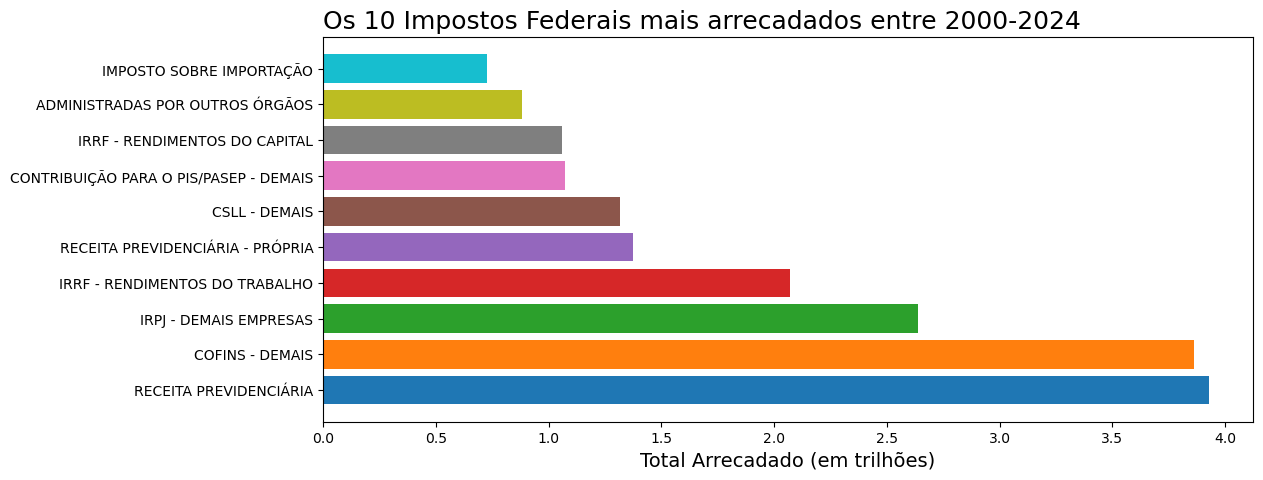

In [10]:
# Plotando um gráfico de barras horizontal (Total Arrecadado por Tipo de Imposto Federal)
from matplotlib import colors as mcolors
cores = list(mcolors.TABLEAU_COLORS.values())

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(top_10["Imposto"], top_10["Total_Arrecadado"] / 1e12, color=cores[:len(top_10)])
ax.set_title(label="Os 10 Impostos Federais mais arrecadados entre 2000-2024", loc="left", fontsize=18)
ax.set_xlabel("Total Arrecadado (em trilhões)", fontsize=14)

plt.show()

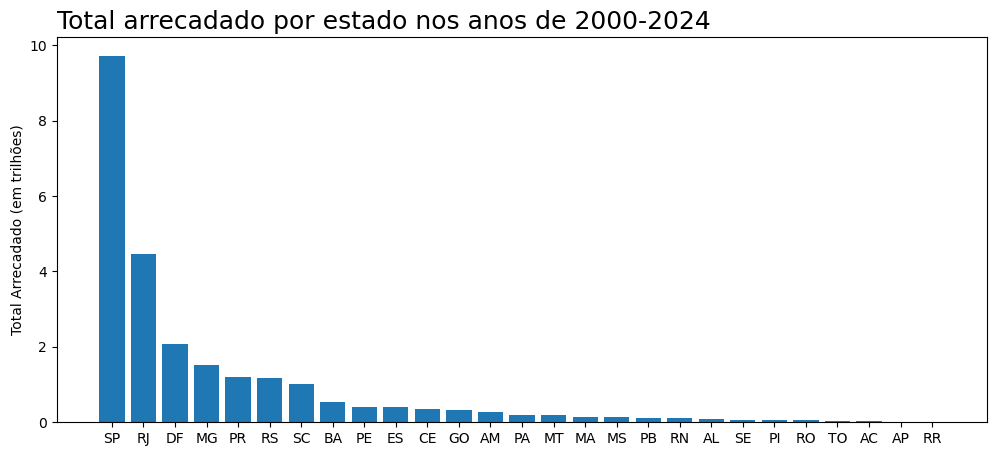

In [11]:
# Plotando um gráfico de barras (Total Arrecadado por Estado)
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(estados_agrupados["UF"], estados_agrupados["TOTAL_ARRECADADO"] / 1e12)
ax.set_title(label="Total arrecadado por estado nos anos de 2000-2024", loc="left", fontsize=18)
ax.set_ylabel("Total Arrecadado (em trilhões)")

plt.show()

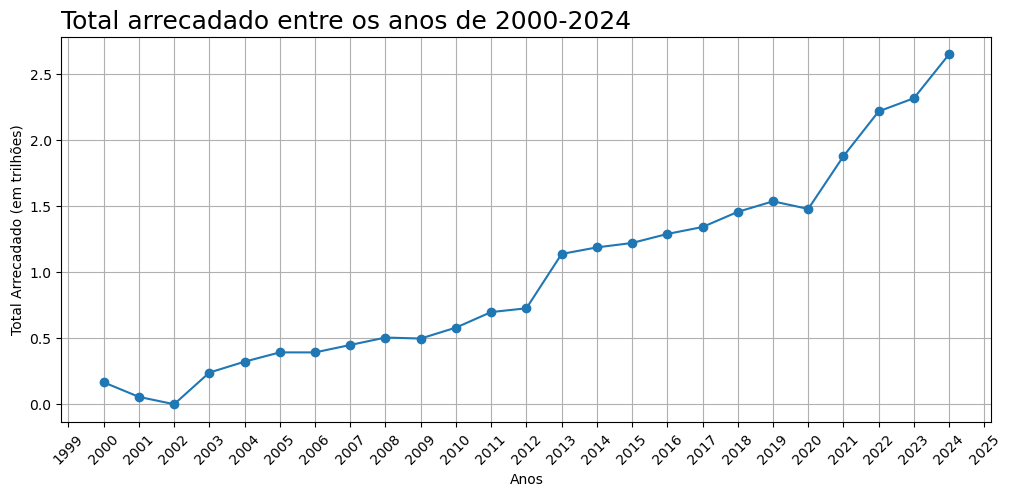

In [12]:
# Plotando um gráfico de barras (Total Arrecadado por Ano)
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(anos_agrupados["ANO"], anos_agrupados["TOTAL_ARRECADADO"] / 1e12, marker='o')
ax.set_title(label="Total arrecadado entre os anos de 2000-2024", loc="left", fontsize=18)
ax.set_xlabel("Anos")
ax.set_ylabel("Total Arrecadado (em trilhões)")
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.tick_params(axis='x', labelrotation=45)
ax.grid()

plt.show()

In [13]:
arrecadacao_mensal_anual = df.groupby(["ANO", "MÊS"])["TOTAL_ARRECADADO"].sum().reset_index()
arrecadacao_mensal_anual.columns = ["ANO", "MÊS", "TOTAL_ARRECADADO"]
arrecadacao_mensal_anual

,ANO,MÊS,TOTAL_ARRECADADO
0,2000,Abril,1.307822e+10
1,2000,Agosto,1.365995e+10
2,2000,Dezembro,1.659367e+10
3,2000,Fevereiro,1.220576e+10
4,2000,Janeiro,1.369189e+10
...,...,...,...
295,2024,Maio,2.029790e+11
296,2024,Mar�o,1.906108e+11
297,2024,Novembro,2.092176e+11
298,2024,Outubro,2.479203e+11
